In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
df = pd.read_csv('data/airline_reviews_oo1.csv')
df

,Header Text,Subheader Text,Brief Text,Aircraft,Type Of Traveller,Recommended,Route,Seat Type,Date Flown,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
0,"""Things have really deteriorated""",\n\nPradeep Madhavan (United Kingdom) 9th July...,✅ Trip Verified | My family and I have flown ...,Boeing 777,Couple Leisure,no,Chennai to London,Premium Economy,Jul-23,9,4.0,5.0,4.0,3.0,4.0,4,NaN
1,"""I will never fly this airline again""",\n\nJeffrey Rice (United States) 9th July 2023,✅ Trip Verified | This has been by far the wo...,A321neo,Couple Leisure,no,Istanbul to London,Economy Class,Jul-23,1,1.0,1.0,1.0,NaN,1.0,1,NaN
2,"""asked for an explanation but have received none""",\n\nBridget Fagan (United Kingdom) 8th July 2023,✅ Trip Verified | In Nov 2022 I booked and pa...,NaN,Solo Leisure,no,London to Edinburgh,Economy Class,Nov-22,2,3.0,1.0,1.0,1.0,4.0,3,3.0
3,"""short-changing passengers""",\n\nBervin Hedman (United Kingdom) 6th July 2023,Not Verified | BA is not treating its premium ...,Boeing 777 -200,Family Leisure,no,Kingston to London,Premium Economy,Jun-23,4,3.0,2.0,1.0,1.0,4.0,1,NaN
4,"""Economy is absolutely awful""",\n\nAlastair Cockburn (South Africa) 5th July ...,✅ Trip Verified | 24 hours before our departu...,Boeing 777-200,Couple Leisure,no,London Heathrow to Cape Town,Economy Class,Jun-23,2,2.0,2.0,NaN,NaN,1.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,British Airways customer review,\n\nC Cutts (United Kingdom) 17th March 2015,LHR-SOF-LHR seat 1A on an upgraded A320 in bot...,NaN,NaN,yes,NaN,Business Class,NaN,8,2.0,3.0,3.0,4.0,NaN,3,NaN
2996,British Airways customer review,\n\nI Gowon (United Kingdom) 17th March 2015,This is not reflective of BA in general only t...,NaN,NaN,yes,NaN,Business Class,NaN,5,1.0,4.0,3.0,1.0,NaN,2,NaN
2997,British Airways customer review,\n\nPanos Anastasopoulos (United Kingdom) 17th...,BA085 LHR to YVR 10/03/15. Narrow seats withou...,NaN,NaN,no,NaN,Economy Class,NaN,3,4.0,5.0,4.0,1.0,NaN,4,NaN
2998,British Airways customer review,\n\nRichard Lightbody (United Kingdom) 9th Mar...,I flew from LHR to SIN; the aircraft was a Boe...,NaN,NaN,yes,NaN,Business Class,NaN,8,1.0,3.0,1.0,2.0,NaN,1,NaN


In [4]:
df.isna().sum()

Header Text                  0
Subheader Text               0
Brief Text                   0
Aircraft                  1153
Type Of Traveller          172
Recommended                  0
Route                      178
Seat Type                    2
Date Flown                 180
Rating/(10)                  0
Seat Comfort               106
Cabin Staff Service        113
Food & Beverages           361
Inflight Entertainment    1078
Ground Service             239
Value For Money              0
Wifi & Connectivity       2405
dtype: int64

In [5]:
df.duplicated().sum()

100

In [6]:
df.describe()

,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
count,3000.000000,2894.000000,2887.000000,2639.000000,1922.000000,2761.000000,3000.000000,595.000000
mean,4.532667,2.812716,3.200901,2.644183,2.655047,2.794640,2.585000,1.885714
std,3.142116,1.362996,1.489333,1.432442,1.392756,1.450207,1.449647,1.329685
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Header Text             3000 non-null   object 
 1   Subheader Text          3000 non-null   object 
 2   Brief Text              3000 non-null   object 
 3   Aircraft                1847 non-null   object 
 4   Type Of Traveller       2828 non-null   object 
 5   Recommended             3000 non-null   object 
 6   Route                   2822 non-null   object 
 7   Seat Type               2998 non-null   object 
 8   Date Flown              2820 non-null   object 
 9   Rating/(10)             3000 non-null   int64  
 10  Seat Comfort            2894 non-null   float64
 11  Cabin Staff Service     2887 non-null   float64
 12  Food & Beverages        2639 non-null   float64
 13  Inflight Entertainment  1922 non-null   float64
 14  Ground Service          2761 non-null   

In [8]:
Name = []
Date = []

for string in df['Subheader Text']:
    split_values = string.split()
    name = " ".join(split_values[:2])
    date = " ".join(split_values[-3:])
    Name.append(name)
    Date.append(date)

In [9]:
import re

# Creating an empty list to store the extracted values
Nationality = []

# Extracting the values between parentheses for each string
for string in df['Subheader Text']:
    matches = re.search(r'\((.*?)\)', string)
    if matches:
        value = matches.group(1)
        Nationality.append(value)
    else:
        Nationality.append(None)    

# Printing the extracted values
for value in Nationality:
    print("Value:", value)


Value: United Kingdom
Value: United States
Value: United Kingdom
Value: United Kingdom
Value: South Africa
Value: United Kingdom
Value: Greece
Value: Italy
Value: Senegal
Value: United States
Value: United Arab Emirates
Value: United Kingdom
Value: United Kingdom
Value: United States
Value: United States
Value: United States
Value: United Kingdom
Value: United Kingdom
Value: United Kingdom
Value: United States
Value: United States
Value: United Kingdom
Value: United Kingdom
Value: United States
Value: United States
Value: Romania
Value: United States
Value: Australia
Value: United Kingdom
Value: United States
Value: United Kingdom
Value: United States
Value: United Kingdom
Value: United States
Value: Greece
Value: United Kingdom
Value: Canada
Value: United States
Value: Australia
Value: United States
Value: Cyprus
Value: United States
Value: Italy
Value: United Kingdom
Value: Canada
Value: United States
Value: Spain
Value: Chile
Value: United Kingdom
Value: United Kingdom
Value: United

In [10]:
df['Name'] = Name
df['Date'] = Date
df['Nationality'] = Nationality

In [11]:
df.head()

,Header Text,Subheader Text,Brief Text,Aircraft,Type Of Traveller,Recommended,Route,Seat Type,Date Flown,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Name,Date,Nationality
0,"""Things have really deteriorated""",\n\nPradeep Madhavan (United Kingdom) 9th July...,✅ Trip Verified | My family and I have flown ...,Boeing 777,Couple Leisure,no,Chennai to London,Premium Economy,Jul-23,9,4.0,5.0,4.0,3.0,4.0,4,NaN,Pradeep Madhavan,9th July 2023,United Kingdom
1,"""I will never fly this airline again""",\n\nJeffrey Rice (United States) 9th July 2023,✅ Trip Verified | This has been by far the wo...,A321neo,Couple Leisure,no,Istanbul to London,Economy Class,Jul-23,1,1.0,1.0,1.0,NaN,1.0,1,NaN,Jeffrey Rice,9th July 2023,United States
2,"""asked for an explanation but have received none""",\n\nBridget Fagan (United Kingdom) 8th July 2023,✅ Trip Verified | In Nov 2022 I booked and pa...,NaN,Solo Leisure,no,London to Edinburgh,Economy Class,Nov-22,2,3.0,1.0,1.0,1.0,4.0,3,3.0,Bridget Fagan,8th July 2023,United Kingdom
3,"""short-changing passengers""",\n\nBervin Hedman (United Kingdom) 6th July 2023,Not Verified | BA is not treating its premium ...,Boeing 777 -200,Family Leisure,no,Kingston to London,Premium Economy,Jun-23,4,3.0,2.0,1.0,1.0,4.0,1,NaN,Bervin Hedman,6th July 2023,United Kingdom
4,"""Economy is absolutely awful""",\n\nAlastair Cockburn (South Africa) 5th July ...,✅ Trip Verified | 24 hours before our departu...,Boeing 777-200,Couple Leisure,no,London Heathrow to Cape Town,Economy Class,Jun-23,2,2.0,2.0,NaN,NaN,1.0,1,NaN,Alastair Cockburn,5th July 2023,South Africa


In [12]:
df.nunique()

Header Text               2485
Subheader Text            2817
Brief Text                2897
Aircraft                   192
Type Of Traveller            4
Recommended                  2
Route                     1462
Seat Type                    4
Date Flown                 107
Rating/(10)                 10
Seat Comfort                 5
Cabin Staff Service          5
Food & Beverages             5
Inflight Entertainment       5
Ground Service               5
Value For Money              5
Wifi & Connectivity          5
Name                      2058
Date                      1573
Nationality                 68
dtype: int64

In [13]:
df.drop(['Subheader Text','Date Flown'],axis=1,inplace=True)

In [14]:
df['Wifi & Connectivity'].fillna(0,inplace=True)

In [15]:
df['Seat Type'].replace(to_replace = 0,  method='ffill', inplace=True)

In [16]:
df.head()

,Header Text,Brief Text,Aircraft,Type Of Traveller,Recommended,Route,Seat Type,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Name,Date,Nationality
0,"""Things have really deteriorated""",✅ Trip Verified | My family and I have flown ...,Boeing 777,Couple Leisure,no,Chennai to London,Premium Economy,9,4.0,5.0,4.0,3.0,4.0,4,0.0,Pradeep Madhavan,9th July 2023,United Kingdom
1,"""I will never fly this airline again""",✅ Trip Verified | This has been by far the wo...,A321neo,Couple Leisure,no,Istanbul to London,Economy Class,1,1.0,1.0,1.0,NaN,1.0,1,0.0,Jeffrey Rice,9th July 2023,United States
2,"""asked for an explanation but have received none""",✅ Trip Verified | In Nov 2022 I booked and pa...,NaN,Solo Leisure,no,London to Edinburgh,Economy Class,2,3.0,1.0,1.0,1.0,4.0,3,3.0,Bridget Fagan,8th July 2023,United Kingdom
3,"""short-changing passengers""",Not Verified | BA is not treating its premium ...,Boeing 777 -200,Family Leisure,no,Kingston to London,Premium Economy,4,3.0,2.0,1.0,1.0,4.0,1,0.0,Bervin Hedman,6th July 2023,United Kingdom
4,"""Economy is absolutely awful""",✅ Trip Verified | 24 hours before our departu...,Boeing 777-200,Couple Leisure,no,London Heathrow to Cape Town,Economy Class,2,2.0,2.0,NaN,NaN,1.0,1,0.0,Alastair Cockburn,5th July 2023,South Africa


In [17]:
df.isna().sum()

Header Text                  0
Brief Text                   0
Aircraft                  1153
Type Of Traveller          172
Recommended                  0
Route                      178
Seat Type                    2
Rating/(10)                  0
Seat Comfort               106
Cabin Staff Service        113
Food & Beverages           361
Inflight Entertainment    1078
Ground Service             239
Value For Money              0
Wifi & Connectivity          0
Name                         0
Date                         0
Nationality                  1
dtype: int64

In [18]:
list = ['Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Ground Service']
for i in list:
    df[i].fillna(0,inplace=True)

In [19]:
df.drop('Aircraft',axis=1,inplace=True)

In [20]:
df.drop('Route',axis=1,inplace=True)

In [21]:
df.head()

,Header Text,Brief Text,Type Of Traveller,Recommended,Seat Type,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Name,Date,Nationality
0,"""Things have really deteriorated""",✅ Trip Verified | My family and I have flown ...,Couple Leisure,no,Premium Economy,9,4.0,5.0,4.0,3.0,4.0,4,0.0,Pradeep Madhavan,9th July 2023,United Kingdom
1,"""I will never fly this airline again""",✅ Trip Verified | This has been by far the wo...,Couple Leisure,no,Economy Class,1,1.0,1.0,1.0,0.0,1.0,1,0.0,Jeffrey Rice,9th July 2023,United States
2,"""asked for an explanation but have received none""",✅ Trip Verified | In Nov 2022 I booked and pa...,Solo Leisure,no,Economy Class,2,3.0,1.0,1.0,1.0,4.0,3,3.0,Bridget Fagan,8th July 2023,United Kingdom
3,"""short-changing passengers""",Not Verified | BA is not treating its premium ...,Family Leisure,no,Premium Economy,4,3.0,2.0,1.0,1.0,4.0,1,0.0,Bervin Hedman,6th July 2023,United Kingdom
4,"""Economy is absolutely awful""",✅ Trip Verified | 24 hours before our departu...,Couple Leisure,no,Economy Class,2,2.0,2.0,0.0,0.0,1.0,1,0.0,Alastair Cockburn,5th July 2023,South Africa


In [22]:
list_2 = ['Seat Type','Nationality']
for i in list_2:
    df[i].fillna(0,inplace=True)

In [23]:
df.dropna(subset= ['Type Of Traveller'],inplace=True)

In [24]:
df['Seat Type'].replace(to_replace = 0,  method='ffill', inplace=True)

In [25]:
df.nunique()

Header Text               2483
Brief Text                2726
Type Of Traveller            4
Recommended                  2
Seat Type                    4
Rating/(10)                 10
Seat Comfort                 6
Cabin Staff Service          6
Food & Beverages             6
Inflight Entertainment       6
Ground Service               6
Value For Money              5
Wifi & Connectivity          6
Name                      1929
Date                      1525
Nationality                 68
dtype: int64

Converting the string date to actual date format

In [26]:
date_str = df['Date']

In [27]:
def parse_date(date_str):
    # Split the date string into day, month, and year parts
    day_str, month_str, year_str = date_str.split()

    # Remove suffixes 'st', 'nd', 'rd', or 'th' from the day part
    if day_str.endswith(('st', 'nd', 'rd', 'th')):
        day_str = day_str[:-2]

    # Concatenate the modified parts and parse the date string into a datetime object
    modified_date_str = f"{day_str} {month_str} {year_str}"
    date_obj = datetime.strptime(modified_date_str, '%d %B %Y')
    return date_obj


In [28]:
# Assuming you have a list of 3000 date values in your dataset
date_values = df['Date']  # Replace "..." with the rest of your date values

# Create an empty list to store the parsed date values
parsed_dates = []

# Iterate through each date value and parse it
for date_str in date_values:
    parsed_date = parse_date(date_str)
    parsed_dates.append(parsed_date.strftime('%d-%m-%Y'))


In [29]:
df['date'] = parsed_dates
df.drop('Date',axis=1,inplace=True)

In [30]:
df.to_csv("new_BA_data.csv",index=False)

## EXPLORING DATA

In [31]:
df.head()

,Header Text,Brief Text,Type Of Traveller,Recommended,Seat Type,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Name,Nationality,date
0,"""Things have really deteriorated""",✅ Trip Verified | My family and I have flown ...,Couple Leisure,no,Premium Economy,9,4.0,5.0,4.0,3.0,4.0,4,0.0,Pradeep Madhavan,United Kingdom,09-07-2023
1,"""I will never fly this airline again""",✅ Trip Verified | This has been by far the wo...,Couple Leisure,no,Economy Class,1,1.0,1.0,1.0,0.0,1.0,1,0.0,Jeffrey Rice,United States,09-07-2023
2,"""asked for an explanation but have received none""",✅ Trip Verified | In Nov 2022 I booked and pa...,Solo Leisure,no,Economy Class,2,3.0,1.0,1.0,1.0,4.0,3,3.0,Bridget Fagan,United Kingdom,08-07-2023
3,"""short-changing passengers""",Not Verified | BA is not treating its premium ...,Family Leisure,no,Premium Economy,4,3.0,2.0,1.0,1.0,4.0,1,0.0,Bervin Hedman,United Kingdom,06-07-2023
4,"""Economy is absolutely awful""",✅ Trip Verified | 24 hours before our departu...,Couple Leisure,no,Economy Class,2,2.0,2.0,0.0,0.0,1.0,1,0.0,Alastair Cockburn,South Africa,05-07-2023


In [32]:
print("categories in 'Types of Travellers' variable: ",end=" ")
print(df['Type Of Traveller'].unique())

print("categories in 'Recommended' variable: ",end=" ")
print(df['Recommended'].unique())

print("categories in 'Seat Type' variable: ",end=" ")
print(df['Seat Type'].unique())

print("categories in 'Nationality' variable: ",end=" ")
print(df['Nationality'].unique())

categories in 'Types of Travellers' variable:  ['Couple Leisure' 'Solo Leisure' 'Family Leisure' 'Business']
categories in 'Recommended' variable:  ['no' 'yes']
categories in 'Seat Type' variable:  ['Premium Economy' 'Economy Class' 'Business Class' 'First Class']
categories in 'Nationality' variable:  ['United Kingdom' 'United States' 'South Africa' 'Greece' 'Italy'
 'Senegal' 'United Arab Emirates' 'Romania' 'Australia' 'Canada' 'Cyprus'
 'Spain' 'Chile' 'Sweden' 'Ireland' 'Hong Kong' 'Netherlands' 'Austria'
 'France' 'India' 'Singapore' 'New Zealand' 'Ghana' 'Germany'
 'Switzerland' 'Bermuda' 'Botswana' 'Brazil' 'Panama' 'Nigeria'
 'Russian Federation' 'Philippines' 'Bulgaria' 'Poland' 'Thailand'
 'Argentina' 'Mexico' 'Denmark' 'Saint Kitts and Nevis' 'Vietnam'
 'Belgium' 'Norway' 'Czech Republic' 'Malaysia' 'Jordan' 'Japan' 'Taiwan'
 'China' 'Slovakia' 'Kuwait' 'Israel' 'Qatar' 'South Korea' 'Saudi Arabia'
 'Hungary' 'Portugal' 'Cayman Islands' 'Costa Rica' 'Egypt' 'Iceland'
 'Laos

In [33]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numeric features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 8 numeric features: ['Rating/(10)', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Ground Service', 'Value For Money', 'Wifi & Connectivity']
We have 8 categorical features: ['Header Text', 'Brief Text', 'Type Of Traveller', 'Recommended', 'Seat Type', 'Name', 'Nationality', 'date']


## EDA(VISUALIZATION)

In [34]:
df.head()

,Header Text,Brief Text,Type Of Traveller,Recommended,Seat Type,Rating/(10),Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Name,Nationality,date
0,"""Things have really deteriorated""",✅ Trip Verified | My family and I have flown ...,Couple Leisure,no,Premium Economy,9,4.0,5.0,4.0,3.0,4.0,4,0.0,Pradeep Madhavan,United Kingdom,09-07-2023
1,"""I will never fly this airline again""",✅ Trip Verified | This has been by far the wo...,Couple Leisure,no,Economy Class,1,1.0,1.0,1.0,0.0,1.0,1,0.0,Jeffrey Rice,United States,09-07-2023
2,"""asked for an explanation but have received none""",✅ Trip Verified | In Nov 2022 I booked and pa...,Solo Leisure,no,Economy Class,2,3.0,1.0,1.0,1.0,4.0,3,3.0,Bridget Fagan,United Kingdom,08-07-2023
3,"""short-changing passengers""",Not Verified | BA is not treating its premium ...,Family Leisure,no,Premium Economy,4,3.0,2.0,1.0,1.0,4.0,1,0.0,Bervin Hedman,United Kingdom,06-07-2023
4,"""Economy is absolutely awful""",✅ Trip Verified | 24 hours before our departu...,Couple Leisure,no,Economy Class,2,2.0,2.0,0.0,0.0,1.0,1,0.0,Alastair Cockburn,South Africa,05-07-2023


## ED 1. Total Counts of Ratings Given By Passengers

Text(0.5, 0.98, 'Counts for each ratings')

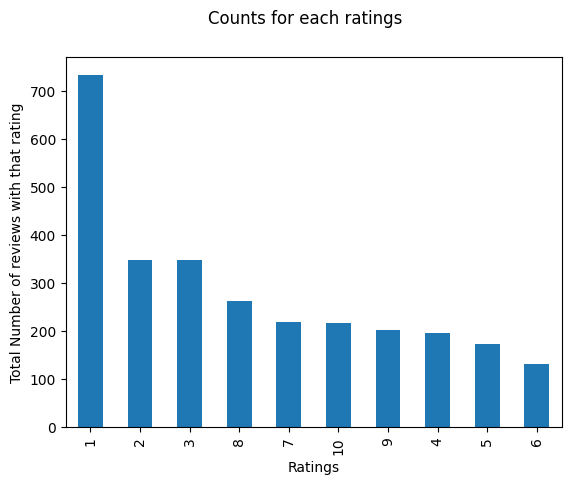

In [35]:
df['Rating/(10)'].value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

1. the total ratings counts was clearly showing us that most passengers are given 1 and 3 stars.
2. which shows that they are some what dissapointed.

In [36]:
df_ratings = pd.DataFrame(df['Rating/(10)'].value_counts())

In [37]:
df_ratings.reset_index(inplace=True)

In [38]:
pct_values = (df_ratings['Rating/(10)'].values/ df_ratings['Rating/(10)'].values.sum() *100).tolist()
df_ratings['pct_values'] = pct_values

## Ed 2. What is the Maximum ratings count given by various country passengers? 

Text(0.5, 1.0, 'Maximum number of review by country')

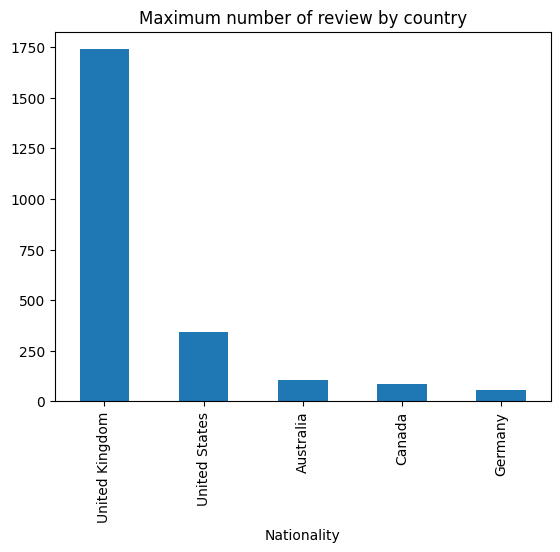

In [39]:
df['Nationality'].value_counts().head().plot(kind="bar", x='Nationality')
plt.title("Maximum number of review by country")

the maximum number of ratings was given by these 5 nations:
1. United Kingdom
2. United States
3. Australia
4. Canada
5. Germany

## Ed 3. Avereage ratings given by nation  

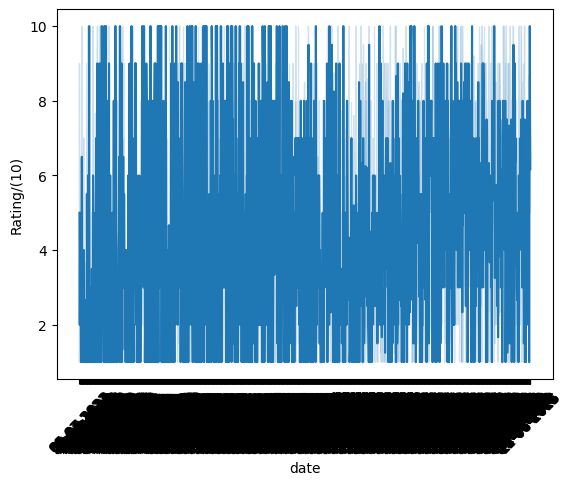

In [40]:
sns.lineplot(data=df, x='date', y='Rating/(10)')
plt.xticks(rotation=45)
plt.show()

from may 2020 to August 2021 the reviews got submitted less in number beacause of Covid Pandemic.

In [43]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KAUSHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [47]:
if 'Brief Text' in df.columns:
    for i in range(len(df)):
        # Check if the index i exists in df
        if i in df.index:
            review = re.sub('[^a-zA-Z]', ' ', str(df['Brief Text'][i]))
            review = review.lower()
            review = review.split()

            review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
            review = ' '.join(review)
            corpus.append(review)
else:
    print("'Brief Text' column not found in the DataFrame.")

In [48]:
plt.figure(figsize=(20,10))
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

<Figure size 2000x1000 with 0 Axes>